In [6]:
import os
try:
	os.chdir(os.path.join(os.getcwd(), 'ex1'))
	print(os.getcwd())
except:
	pass

C:\Users\Administrator\Desktop\ml_ipynb\ex1


 # ex1 - 单变量线性回归

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib.colors import LogNorm
#引入公式包
from helper import formulas

In [8]:
#加载数据
path =  'ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
#画出数据散点图
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))
plt.show()

 让我们在训练集中添加一列，以便我们可以使用向量化的解决方案来计算代价和梯度。

In [10]:
# 插入名称是Ones的一列
data.insert(0, 'Ones', 1)
# 现在cols是3
cols = data.shape[1]
X = data.iloc[:,0:cols-1]#X是所有行，去掉最后一列
y = data.iloc[:,cols-1:cols]#X是所有行，最后一列
# 转换为np对象
# X.shape = [97 2]
X = np.matrix(X.values)
# y.shape = [97 1]
y = np.matrix(y.values)
# theta.shape = [2,1],我们用列向量的方式
theta = np.matrix(np.zeros([2,1]))
#把参数打印出来看一下
theta.shape,X.shape,y.shape


((2, 1), (97, 2), (97, 1))

 计算代价函数 (theta初始值为0).

In [11]:
formulas.linearReg_cost(X, y, theta)

32.072733877455676

 初始化一些附加变量 - 学习速率α和要执行的迭代次数。并且执行代码

In [40]:
alpha = 0.01
iters = 1000
g, cost = formulas.linearReg_gradDesc(X, y, theta, alpha, iters)
#打印g
g



matrix([[-3.24140214],
        [ 1.1272942 ]])

 最后，我们可以使用我们拟合的参数计算训练模型的代价函数（误差）。

In [41]:
formulas.linearReg_cost(X, y, g)


4.515955503078912

 现在我们来绘制线性模型以及数据，直观地看出它的拟合。

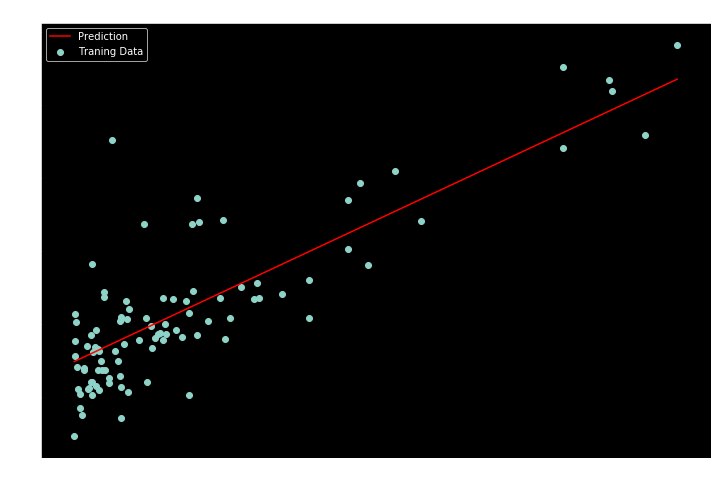

In [42]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0, 0] + (g[1,0] * x)
# 开始画图
fig, ax = plt.subplots(figsize=(12,8))
# 模拟的直线
ax.plot(x, f, 'r', label='Prediction')
# 数据三点图
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()


 画出J随着迭代次数的图像.请注意，代价总是降低 - 这是凸优化问题的一个例子。

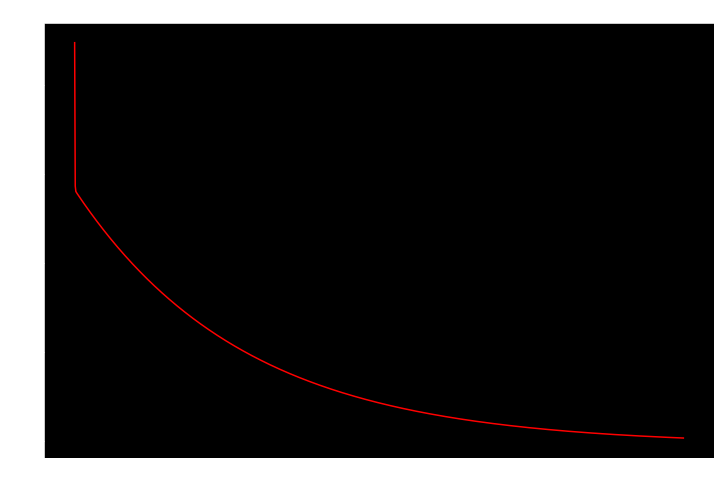

In [43]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()



In [44]:
# 画出contour
""" theta0_vals = np.linspace(-10,10,100)
theta1_vals = np.linspace(-1,4,100)
xs, ys = np.meshgrid(theta0_vals, theta1_vals)
J_vals = np.zeros(xs.shape)

for i in range(0, theta0_vals.size):
    for j in range(0, theta1_vals.size):
        t = np.array([theta0_vals[i], theta1_vals[j]])
        J_vals[i][j] = computeCost(X, y, t)

J_vals = np.transpose(J_vals)

fig1 = plt.figure(1)
ax = fig1.gca(projection='3d')
ax.plot_surface(xs, ys, J_vals)
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')

plt.figure(2)
lvls = np.logspace(-2, 3, 20)
plt.contour(xs, ys, J_vals, levels=[-1,1], norm=LogNorm())
plt.plot(theta[0], theta[1], c='r', marker="x") """

